In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import keras
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_json('News_Category_Dataset_v3.json', lines = True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [5]:
df.drop(['link', 'headline', 'authors', 'date'], axis = 1, inplace = True)
df.head()

,category,short_description
0,U.S. NEWS,Health experts said it is too early to predict...
1,U.S. NEWS,He was subdued by passengers and crew when he ...
2,COMEDY,"""Until you have a dog you don't understand wha..."
3,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [3]:
def makeLower(text):
    return text.lower()

In [4]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [6]:
df['short_description'] = df['short_description'].apply(makeLower)
df['short_description'] = df['short_description'].apply(remove_punct)

df.head()

,category,short_description
0,U.S. NEWS,health experts said it is too early to predict...
1,U.S. NEWS,he was subdued by passengers and crew when he ...
2,COMEDY,until you have a dog you dont understand what ...
3,PARENTING,accidentally put grownup toothpaste on my todd...
4,U.S. NEWS,amy cooper accused investment firm franklin te...


In [8]:
stopwords = stopwords.words('english')
stopwords.append('and')

In [11]:
def clean(text):
    words = text.split()
    new_words = []
    
    for w in words:
        if w not in stopwords and w.isalpha():
            new_words.append(w)
            
    new_sent = ' '.join(new_words)
    return new_sent

In [12]:
df['short_description'] = df['short_description'].apply(clean)

df.head()

,category,short_description
0,U.S. NEWS,health experts said early predict whether dema...
1,U.S. NEWS,subdued passengers crew fled back aircraft con...
2,COMEDY,dog dont understand could eaten
3,PARENTING,accidentally put grownup toothpaste toothbrush...
4,U.S. NEWS,amy cooper accused investment firm franklin te...


In [13]:
X = df['short_description']
Y = df['category']

In [14]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([35, 35,  5, ..., 28, 28, 28])

In [16]:
le.classes_

array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
       'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
       'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
       'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
       'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
       'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST',
       'TRAVEL', 'U.S. NEWS', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS',
       'WOMEN', 'WORLD NEWS', 'WORLDPOST'], dtype=object)

In [26]:
num_classes = len(le.classes_)
num_classes

42

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, stratify = Y, test_size = 0.25, random_state = 40)
len(Xtrain), len(Xtest)

(157145, 52382)

In [20]:
tokenizer = Tokenizer(num_words = 1000, oov_token = '<OOV>')
tokenizer.fit_on_texts(Xtrain)

In [22]:
word_index = tokenizer.word_index
len(word_index)

78597

In [23]:
max_length = max([len(sent.split(' ')) for sent in Xtrain])
max_length

139

In [24]:
train_sequences = tokenizer.texts_to_sequences(Xtrain)
train_padded_sequences = pad_sequences(train_sequences, maxlen = max_length, padding = 'post')

In [25]:
test_sequences = tokenizer.texts_to_sequences(Xtest)
test_padded_sequences = pad_sequences(test_sequences, maxlen = max_length, padding = 'post')

In [27]:
model = keras.Sequential([
    layers.Embedding(input_dim = len(word_index) + 1, output_dim = 64, input_length = max_length),
    
    layers.Bidirectional(layer = layers.LSTM(units = 32)),
    
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dropout(0.4),
    
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dropout(0.4),
    
    layers.Dense(units = num_classes, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 139, 64)           5030272   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
hist = model.fit(train_padded_sequences, Ytrain, validation_split = 0.2, batch_size = 64, epochs = 10)

Epoch 1/10
1965/1965 [==============================] - 505s 257ms/step - loss: 2.8996 - accuracy: 0.2658 - val_loss: 2.6809 - val_accuracy: 0.3076
Epoch 2/10
1965/1965 [==============================] - 466s 237ms/step - loss: 2.7020 - accuracy: 0.3146 - val_loss: 2.5998 - val_accuracy: 0.3262
Epoch 3/10
1965/1965 [==============================] - 458s 233ms/step - loss: 2.6355 - accuracy: 0.3275 - val_loss: 2.5566 - val_accuracy: 0.3350
Epoch 4/10
1965/1965 [==============================] - 462s 235ms/step - loss: 2.5999 - accuracy: 0.3342 - val_loss: 2.5433 - val_accuracy: 0.3360
Epoch 5/10
1965/1965 [==============================] - 469s 239ms/step - loss: 2.5712 - accuracy: 0.3389 - val_loss: 2.5198 - val_accuracy: 0.3391
Epoch 6/10
1965/1965 [==============================] - 380s 193ms/step - loss: 2.5492 - accuracy: 0.3414 - val_loss: 2.5195 - val_accuracy: 0.3410
Epoch 7/10
1965/1965 [==============================] - 357s 182ms/step - loss: 2.5305 - accuracy: 0.3461 - val_

Text(0.5, 1.0, 'Loss')

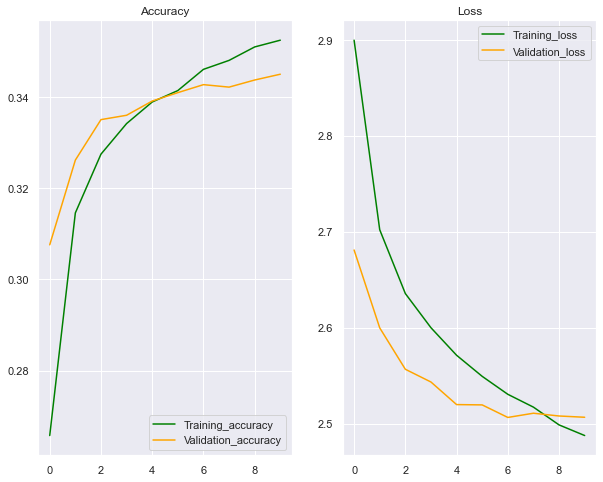

In [33]:
plt.figure(figsize = (10, 8))

plt.subplot(1, 2, 1)
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(10)
plt.plot(epochs, train_acc, label = 'Training_accuracy', color = 'green')
plt.plot(epochs, val_acc, label = 'Validation_accuracy', color = 'orange')
plt.legend(loc = 'lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(10)
plt.plot(epochs, train_loss, label = 'Training_loss', color = 'green')
plt.plot(epochs, val_loss, label = 'Validation_loss', color = 'orange')
plt.legend(loc = 'upper right')
plt.title('Loss')